<ipython-input-5-02731d10452e>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_triple=np.array(data)[0]


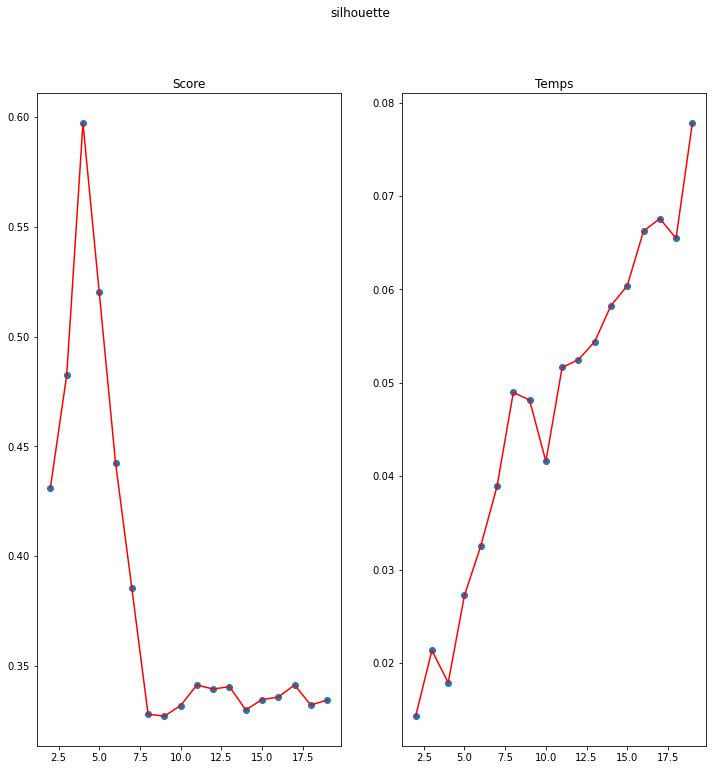

'\nkm = cluster.KMeans(n_clusters=2).fit_predict(data_tab)\nplt.figure(figsize=(12,12))\nplt.scatter(data_x,data_y,c=km)\nplt.show()\n'

In [5]:
from scipy.io import arff
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import metrics

data = arff.loadarff(open('square1.arff','r'))
data_triple=np.array(data)[0]
data_tab=[]
data_x = []
data_y = []
for tuple in data_triple:
    data_tab.append([tuple[0],tuple[1]])
    data_x.append(tuple[0])
    data_y.append(tuple[1])   
#print(data_tab[:,0])

#################
#    A FAIRE    #
#################
"""
Faire une fonction prenant en parametre la metrique pour faire un case
"""
#################
#################
#Silhouette metrics

def calcul(data_tab,method,deb,fin):
    times=[]
    grades=[]
    if(method=="silhouette"):
        for k in range(deb,fin):
            start=time.time()    
            kmeans = cluster.KMeans(n_clusters=k).fit(data_tab)
            end=time.time()
            labels = kmeans.labels_
            score = metrics.silhouette_score(data_tab,labels,metric = 'euclidean')
            grades.append(score)
            times.append(end-start)
    elif method=="bouldin":
        for k in range(deb,fin):
            start=time.time()
            kmeans = cluster.KMeans(n_clusters=k).fit(data_tab)
            end=time.time()
            labels = kmeans.labels_
            score = metrics.davies_bouldin_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
    elif method=="calinski":
        for k in range(deb,fin):
            start=time.time()
            kmeans = cluster.KMeans(n_clusters=k).fit(data_tab)
            end=time.time()
            labels = kmeans.labels_
            score = metrics.calinski_harabasz_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
    plt.figure(figsize=(12,12))
    plt.subplot(121,title="Score")
    plt.scatter(range(deb,fin),grades)
    plt.plot(range(deb,fin),grades,c='red')
    plt.subplot(122,title="Temps")
    plt.scatter(range(deb,fin),times)
    plt.plot(range(deb,fin),times,c='red')
    plt.suptitle(method)
    plt.show()
        
    
    
    
    
calcul(data_tab,"silhouette",2,20)


"""
km = cluster.KMeans(n_clusters=2).fit_predict(data_tab)
plt.figure(figsize=(12,12))
plt.scatter(data_x,data_y,c=km)
plt.show()
"""



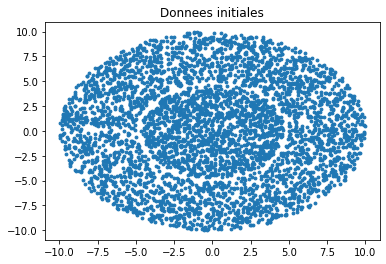

2


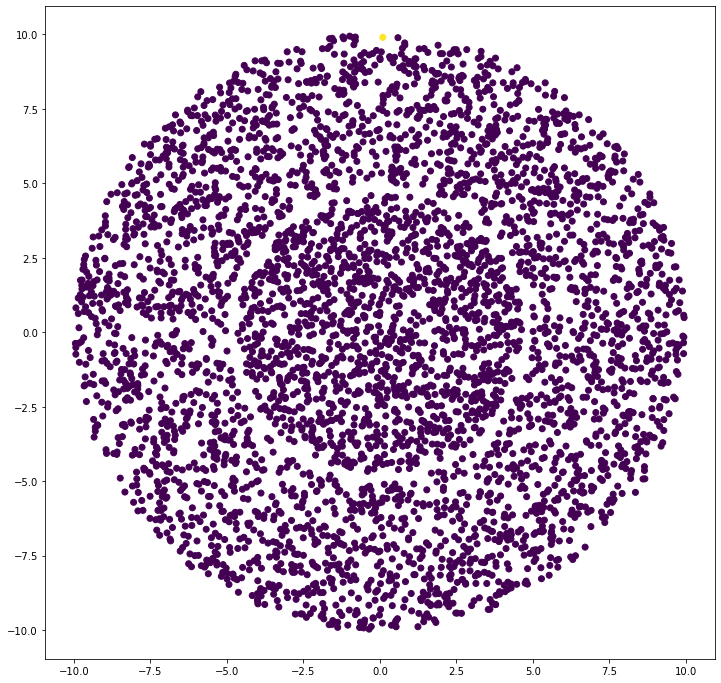

In [52]:
path = './'
databrut = arff.loadarff(open(path+"disk-4500n.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

def calcul_agglo(data_tab,method,linkage,deb,fin):
    agglo = []
    grades = []
    times = []
    if(method=="silhouette"):
        for k in range(deb,fin):
            start=time.time()    
            agglo = cluster.AgglomerativeClustering(n_clusters=k,linkage=linkage).fit(data_tab)
            end=time.time()
            labels = agglo.labels_
            score = metrics.silhouette_score(data_tab,labels,metric = 'euclidean')
            grades.append(score)
            times.append(end-start)
    elif method=="bouldin":
        for k in range(deb,fin):
            start=time.time()
            agglo = cluster.AgglomerativeClustering(n_clusters=k,linkage=linkage).fit(data_tab)
            end=time.time()
            labels = agglo.labels_
            score = metrics.davies_bouldin_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
    elif method=="calinski":
        for k in range(deb,fin):
            start=time.time()
            agglo = cluster.AgglomerativeClustering(n_clusters=k,linkage=linkage).fit(data_tab)
            end=time.time()
            labels = agglo.labels_
            score = metrics.calinski_harabasz_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
    #print(grades)
    max_value = max(grades)
    max_index = grades.index(max_value)
    print(max_index+deb)
    agglo = cluster.AgglomerativeClustering(n_clusters=max_index+deb,linkage=linkage).fit_predict(data_tab)
    plt.figure(figsize=(12,12))
    plt.scatter(f0,f1,c=agglo)
    plt.show()


calcul_agglo(data,"silhouette",'single',2,10)

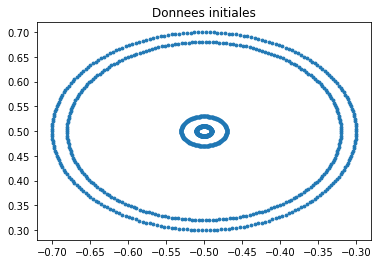

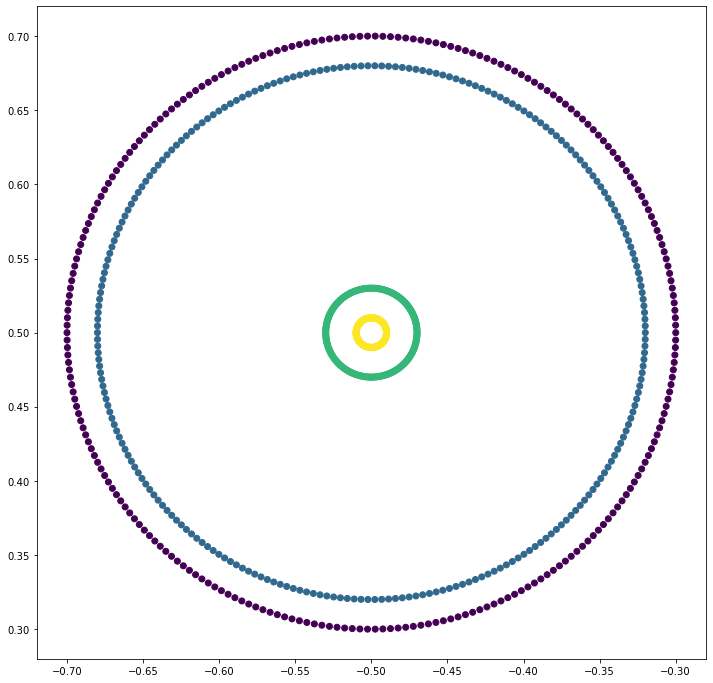

In [71]:
path = './'
databrut = arff.loadarff(open(path+"dartboard2.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

def calcul_dbscan(data_tab,dist,nb):
    start=time.time()
    agglo = cluster.DBSCAN(eps=dist,min_samples=nb).fit_predict(data_tab) 
    end=time.time()
    plt.figure(figsize=(12,12))
    plt.scatter(f0,f1,c=agglo)
    plt.show()

calcul_dbscan(data,0.01,3)

In [1]:
import hdbscan
